In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score,  classification_report
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
müşteriler = pd.read_csv("C:/Users/zmerc/term-deposit-marketing-2020.csv")
le = preprocessing.LabelEncoder()
müşteriler["y"] = le.fit_transform(müşteriler["y"])
müşteriler['marital'] = le.fit_transform(müşteriler['marital'])
müşteriler['education'] = le.fit_transform(müşteriler['education'])
müşteriler['job'] = le.fit_transform(müşteriler['job'])
müşteriler['default'] = le.fit_transform(müşteriler['default'])
müşteriler['month'] = le.fit_transform(müşteriler['month'])
müşteriler['housing'] = le.fit_transform(müşteriler['housing'])
müşteriler['loan'] = le.fit_transform(müşteriler['loan'])
müşteriler['contact'] = le.fit_transform(müşteriler['contact'])



In [3]:
müşteriler

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,53,9,1,2,0,395,0,0,0,3,6,107,1,0
39996,30,4,2,2,0,3340,0,0,0,3,6,238,3,1
39997,54,0,0,1,0,200,0,0,0,3,6,170,1,1
39998,34,4,1,2,0,1047,0,0,0,3,6,342,1,0


Correlation Matrix 



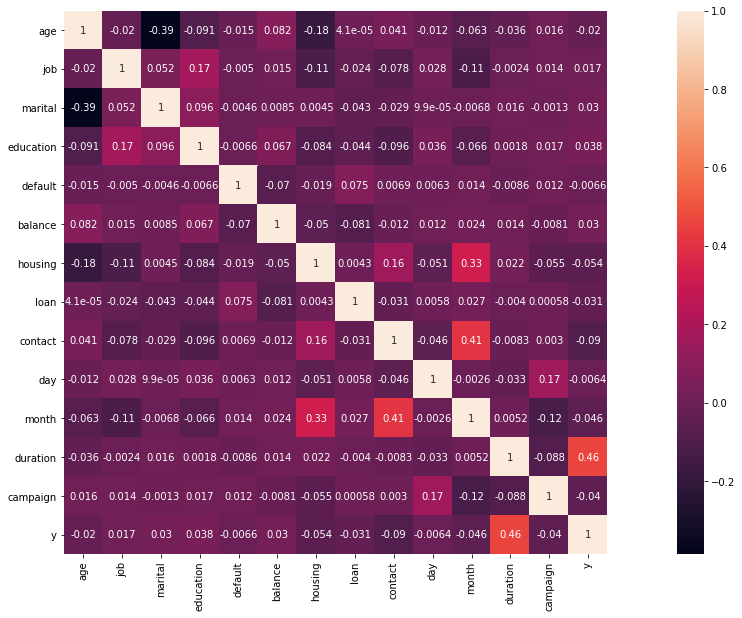

In [4]:
print("Correlation Matrix","\n")    
correlation=müşteriler.corr(method="pearson")
plt.figure(figsize=(25,10))
sns.heatmap(correlation,vmax=1,square=True,annot=True)
plt.show()

In [6]:
y=müşteriler['y']

In [7]:
x= müşteriler.drop(['y'], axis=1).astype('float64')

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [9]:
loj_model = LogisticRegression(solver = "liblinear").fit(x_train,y_train)

In [ ]:
loj_model.intercept_

In [11]:
loj_model.coef_

array([[-6.16751995e-03,  6.09817434e-04,  1.03345429e-01,
         1.57329096e-01,  1.37711928e-01,  1.97593201e-05,
        -5.39382282e-01, -4.04265667e-01, -4.95165608e-01,
         1.70072611e-03, -8.82885341e-03,  4.30400294e-03,
        -8.01254922e-02]])

In [12]:
loj_model.predict(x)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [13]:
y_pred = loj_model.predict(x_test)

In [14]:
accuracy_score(y_test,y_pred)

0.9336666666666666

In [15]:
#5 FOLD CROSS VALİDATİON
cross_val_score(loj_model, x_test, y_test, cv = 5).mean()


0.9338333333333333

In [16]:
#CONFUSİON MATRİX
metrics.confusion_matrix(y_test, y_pred)

array([[11023,   105],
       [  691,   181]], dtype=int64)

In [17]:
accuracy_score= metrics.accuracy_score(y_test, y_pred)
print("Classification Report","\n")
print(classification_report(y_test,y_pred))

Classification Report 

              precision    recall  f1-score   support

           0       0.94      0.99      0.97     11128
           1       0.63      0.21      0.31       872

    accuracy                           0.93     12000
   macro avg       0.79      0.60      0.64     12000
weighted avg       0.92      0.93      0.92     12000



In [18]:
mae = mean_absolute_error(loj_model.predict(x_test), y_test)
mse = mean_squared_error(loj_model.predict(x_test), y_test)
rmse = np.sqrt(mse)
print('Mean Absolute Error (MAE): %.2f' % mae)
print('Mean Squared Error (MSE): %.2f' % mse)
print('Root Mean Squared Error (RMSE): %.2f' % rmse)

Mean Absolute Error (MAE): 0.07
Mean Squared Error (MSE): 0.07
Root Mean Squared Error (RMSE): 0.26


In [19]:

değişkenler=müşteriler.describe().columns


In [20]:
değişkenler

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'y'],
      dtype='object')

In [21]:
alan_müşteriler=müşteriler[müşteriler['y']==1]
alan_müşteriler

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
83,59,0,1,1,0,2343,1,0,2,5,8,1042,1,1
86,56,0,1,1,0,45,0,0,2,5,8,1467,1,1
87,41,9,1,1,0,1270,1,0,2,5,8,1389,1,1
129,55,7,1,1,0,2476,1,0,2,5,8,579,1,1
168,54,0,1,2,0,184,0,0,2,5,8,673,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39986,29,4,2,2,0,637,1,0,0,3,6,340,1,1
39988,55,4,0,2,0,2383,0,0,0,3,6,591,2,1
39990,26,9,2,1,0,1231,1,0,0,3,6,385,2,1
39996,30,4,2,2,0,3340,0,0,0,3,6,238,3,1


Categorical Variables Visualization 



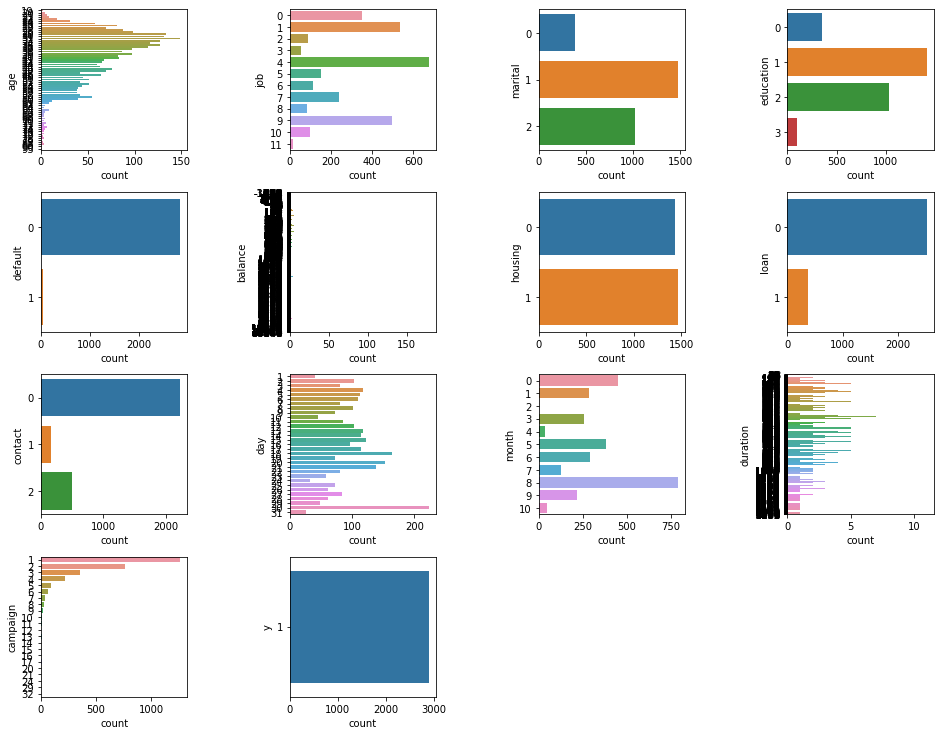

In [53]:
print("Categorical Variables Visualization","\n")
fig, axes = plt.subplots(5, 4, figsize=(16, 16))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.7, hspace=0.3)
for i, ax in enumerate(axes.ravel()):
    if i > 12:
        ax.set_visible(False)
        continue
    sns.countplot(y = değişkenler[i], data=alan_müşteriler, ax=ax)
plt.show()